In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time
import random
import multiprocessing

## 1. 补充全连通图扩散

In [2]:
def diffuse(p, q, m, num_runs=24):  # 全联通扩散模拟
    num_of_adopt = []
    for j in xrange(num_runs):
        dose = sum(num_of_adopt)  # 邻居数量
        prob = p + q * dose
        x = sum([ 1 for i in xrange(m - sum(num_of_adopt)) if random.random() <= prob ])
        num_of_adopt.append(x)
        
    return num_of_adopt

In [21]:
pq_range = [(i, j) for i in np.linspace(0.001, 0.021, num=5) for j in np.linspace(0.2, 0.6, num=20)]
result = []
for p, q in pq_range:
    t1 = time.clock()
    diff_cont = []
    for i in range(20):
        diff = diffuse(p, q / 9999, 10000, num_runs=30)
        diff_cont.append(diff)
    
    mean_diff = np.mean(diff_cont, axis=0)
    result.append(np.concatenate(([p, q], mean_diff)))
    print p, q

np.save('complete_graph(10000)', result)

0.001 0.2
0.001 0.221052631579
0.001 0.242105263158
0.001 0.263157894737
0.001 0.284210526316
0.001 0.305263157895
0.001 0.326315789474
0.001 0.347368421053
0.001 0.368421052632
0.001 0.389473684211
0.001 0.410526315789
0.001 0.431578947368
0.001 0.452631578947
0.001 0.473684210526
0.001 0.494736842105
0.001 0.515789473684
0.001 0.536842105263
0.001 0.557894736842
0.001 0.578947368421
0.001 0.6
0.006 0.2
0.006 0.221052631579
0.006 0.242105263158
0.006 0.263157894737
0.006 0.284210526316
0.006 0.305263157895
0.006 0.326315789474
0.006 0.347368421053
0.006 0.368421052632
0.006 0.389473684211
0.006 0.410526315789
0.006 0.431578947368
0.006 0.452631578947
0.006 0.473684210526
0.006 0.494736842105
0.006 0.515789473684
0.006 0.536842105263
0.006 0.557894736842
0.006 0.578947368421
0.006 0.6
0.011 0.2
0.011 0.221052631579
0.011 0.242105263158
0.011 0.263157894737
0.011 0.284210526316
0.011 0.305263157895
0.011 0.326315789474
0.011 0.347368421053
0.011 0.368421052632
0.011 0.389473684211
0.011

In [22]:
data = np.load('complete_graph(10000).npy')

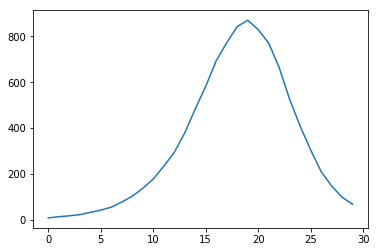

In [29]:
plt.plot(data[7][2:])

### 数据分析

In [30]:
import statsmodels.formula.api as smf
import pandas as pd

In [24]:
est_data = np.load('estimate complete_graph(10000).npy')

In [36]:
zip(np.mean(est_data[:, [4, 5]], axis=0),  np.std(est_data[:, [4, 5]], axis=0))

[(11297.401968845517, 526.60286347816327),
 (0.99847787175320912, 0.0083688201857886734)]

In [31]:
pd_est = pd.DataFrame(est_data, columns=['p', 'q', 'P', 'Q', 'M', 'R2'])

In [32]:
pd_est.head()

,p,q,P,Q,M,R2
0,0.001,0.200000,0.000831,0.184601,10848.972118,0.999745
1,0.001,0.221053,0.000785,0.203549,10751.598948,0.999845
2,0.001,0.242105,0.002732,0.144751,14206.047726,0.915970
3,0.001,0.263158,0.000812,0.233524,11323.387525,0.999775
4,0.001,0.284211,0.000837,0.241817,11787.853658,0.999265


In [37]:
results1 = smf.ols('p ~ P + Q -1', data=pd_est).fit()
a = results1.params['P']
r2 = results1.rsquared
print a, r2

1.26947548813 0.991944112794


In [38]:
results2 = smf.ols('q ~ P + Q - 1', data=pd_est).fit()
a = results2.params['Q']
r2 = results2.rsquared
print a, r2

1.17292172982 0.998550251186


## 2. 补充预测

### 2.1 度分布异质性

In [39]:
u = "C:\\Users\\XIAOYU\\Desktop\\data\\"
coeff_cont_gnm = np.load(u + "2 degree heterogenous\\estimate gnm_random_graph(10000,30000).npy")
coeff_cont_ba =  np.load(u + "2 degree heterogenous\\estimate barabasi_albert_graph(10000,3).npy")
coeff_cont_exp = np.load(u + "2 degree heterogenous\\estimate exponential_graph(10000,3).npy")
coeff_cont_gua = np.load(u + "2 degree heterogenous\\estimate gaussian_graph(10000,3).npy")
coeff_cont_log = np.load(u + "2 degree heterogenous\\estimate lognormal_graph(10000,3).npy")
coeff_cont_ws0 =  np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0).npy")
coeff_cont_ws01 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.1).npy")
coeff_cont_ws03 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.3).npy")
coeff_cont_ws05 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.5).npy")
coeff_cont_ws07 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.7).npy")
coeff_cont_ws09 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,0.9).npy")
coeff_cont_ws10 = np.load(u + "3 small world\\estimate watts_strogatz_graph(10000,6,1).npy")

In [60]:
d_cont = [coeff_cont_gnm, coeff_cont_ba, coeff_cont_exp, coeff_cont_gua,
                   coeff_cont_log, coeff_cont_ws0, coeff_cont_ws01, coeff_cont_ws03,
                   coeff_cont_ws05, coeff_cont_ws07, coeff_cont_ws09, coeff_cont_ws10]

In [61]:
for i, dataset in enumerate(d_cont):
    d_cont[i] = np.array([np.concatenate((x[0], x[1], x[2:])) for x in dataset], dtype=np.float)

In [62]:
d_cont[0][0]

array([  1.00000000e-03,   5.00000000e-02,   1.37543173e-03,
         2.52742348e-01,   8.91400000e+03,   9.99713576e-01,
         1.24048175e+01])

In [ ]:
def 